# Qiskit Assignment 1
## Practice with Pauli Gates and other Qiskit tools
Welcome to your second Qiskit assignment!

### Learning Objectives
1. Build Pauli gates from Qiskit's U gate
2. Use the U gate to reverse a series of operations
3. Visualize rotations using the Bloch Sphere

In [3]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import pprint
import random

#### Task 1 - Constructing Pauli Z gate from u Gate
We can use [Qiskit's UGate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.u.html#qiskit.circuit.QuantumCircuit.u) to construct arbitrary quantum operations. Fill in the function below to return `qc_pauli_z`, a QuantumCircuit satisfying the following conditions:
- it has 1 qubit, [initialized](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize) to the parameter `initial_state`
- it has 1 classical bit
- it has a U gate with parameters which perform the same rotation as a Pauli Z gate
- it does not use the built in Z gate
- it performs a measurement following the rotation

In [4]:
def qc_pauli_z(initial_state=[1,0]):
    # BEGIN SOLUTION
    theta = 0
    phi = np.pi
    lamda = 0
    
    qc_pauli_z = QuantumCircuit(1,1)
    qc_pauli_z.initialize(initial_state, 0)
    qc_pauli_z.u(theta, phi, lamda, 0)
    qc_pauli_z.measure(0,0)
    # END SOLUTION
    return qc_pauli_z

You can use the following code to help visualize your circuit.

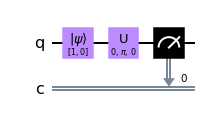

In [5]:
qc_pauli_z().draw(output='mpl')

In [6]:
qc_pauli_z().num_clbits == 1

True

In [7]:
qc_pauli_z().num_qubits == 1

True

In [8]:
def testNoQiskitZGate():
    ops = qc_pauli_z().count_ops()
    try:
        find_z = ops['z']
    except KeyError: # this is the passing case, we don't want Z to be found!
        return True
    else:
        return False
    
testNoQiskitZGate()

True

In [9]:
def testInitialState():
    try:
        num_initializations = qc_pauli_z().count_ops()['initialize']
    except KeyError:
        return False
    else:
        return num_initializations == 1
    
testInitialState()

True

In [10]:
def testMeasurementPerformed():
    try:
        num_measurements = qc_pauli_z().count_ops()['measure']
    except KeyError:
        return False
    else:
        return num_measurements == 1

testMeasurementPerformed()

True

In [11]:
def testRandomInitialState():
    # let's choose something interesting as our initial state!
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    pauli_z_matrix = np.array(
                                [[1, 0],
                                 [0,-1]]
                             )
    
    qc = qc_pauli_z(initial_state)
    qc.remove_final_measurements()
    result_sv = Statevector.from_instruction(qc)
    
    return result_sv.equiv(Statevector(pauli_z_matrix.dot(initial_state)))

testRandomInitialState()

True

In [12]:
# HIDDEN
def testSolutionPauliZ():
    # choose something interesting!
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]

    theta = 0
    phi = np.pi
    lamda = 0
    
    solution_qc = QuantumCircuit(1,1)
    solution_qc.initialize(initial_state, 0)
    solution_qc.z(0)
    
    student_qc = qc_pauli_z(initial_state)
    student_qc.remove_final_measurements()
    return Statevector.from_instruction(student_qc).equiv(Statevector.from_instruction(solution_qc))

testSolutionPauliZ()

True

#### Task 2 - Unitary Inverse

We'll study the idea of [uncomputation](https://qiskit.org/textbook/ch-algorithms/grover.html#5.2-Uncomputing,-and-Completing-the-Oracle) during our discussion of quantum algorithms. In general, we may find it helpful to return a qubit to its initial state. 

This process is typically straightforward due to the properties of unitary gates. However, your task is to do so using only a single U gate. Complete the partial circuits below such that the measurements will yield a state equivalent to `initial_state` *up to a global phase*.

In [13]:
def reverse_a(initial_state=[1,0]):
    qc_reverse_a = QuantumCircuit(1,1)
    qc_reverse_a.initialize(initial_state)
    qc_reverse_a.x(0)
    qc_reverse_a.h(0)
    qc_reverse_a.y(0)
    qc_reverse_a.x(0)
    qc_reverse_a.z(0)
    qc_reverse_a.barrier()
    
   # BEGIN SOLUTION
    theta = 3*np.pi/2
    phi = np.pi
    lamda = np.pi
    qc_reverse_a.u(theta, phi, lamda, 0)
   # END SOLUTION

    qc_reverse_a.barrier()
    qc_reverse_a.measure(0,0)
    return qc_reverse_a

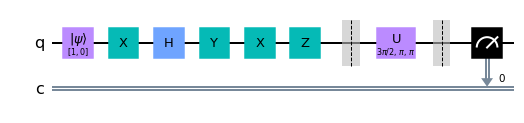

In [14]:
reverse_a().draw(output='mpl')

In [15]:
def testAcceptableGateUsageA():
    ops = reverse_a().count_ops()
    x = ops['x'] == 2
    y = ops['y'] == 1
    z = ops['z'] == 1
    h = ops['h'] == 1
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
        
    return all([x,y,z,h,u])
    
testAcceptableGateUsageA()

True

In [16]:
def testKetZeroA():
    qc = reverse_a()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))
    
testKetZeroA()

Statevector([-6.123234e-17-1.00000000e+00j,  6.123234e-17-1.11022302e-16j],
            dims=(2,))


True

In [17]:
def testKetOneA():
    initial_state = [0,1]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))
    
testKetOneA()

Statevector([ 6.1232340e-17+1.11022302e-16j,
             -1.8369702e-16-1.00000000e+00j],
            dims=(2,))


True

In [21]:
def testRandomSimpleA():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))
    
testRandomSimpleA()

Statevector([ 1.92716147e-16+0.91344013j, -1.30691829e-16-0.40697314j],
            dims=(2,))


True

In [23]:
# HIDDEN
def testRandomHiddenA():
    results = []
    for i in range(3):
        c = random.uniform(0, 2*np.pi)
        initial_state = [(np.cos(c)), (np.sin(c))]
        qc = reverse_a(initial_state)
        qc.remove_final_measurements()
        sv = Statevector.from_instruction(qc)
        results.append(sv.equiv(Statevector(initial_state)))
    return all(results)
    
testRandomHiddenA()

True

In [70]:
def reverse_b(initial_state=[1,0]):
    qc_reverse_b = QuantumCircuit(1,1)
    qc_reverse_b.initialize(initial_state)
    for i in range(5):
        qc_reverse_b.x(0)
        qc_reverse_b.y(0)
        qc_reverse_b.z(0)
        qc_reverse_b.h(0)
    qc_reverse_b.barrier()
    
    
    # BEGIN SOLUTION
    # Use identity commutation relation YX = -iZ
    # so that (HZYX)^5=(-iHZZ)^5=(-iH)^5=-iH
    # Hence to measure state within a global we use
    # parameters for the U gate such that U == H
    theta = np.pi/2
    phi = 0
    lamda = np.pi
    qc_reverse_b.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc_reverse_b.barrier()
    qc_reverse_b.measure(0,0)
    return qc_reverse_b

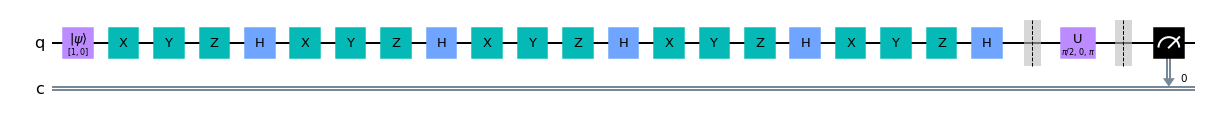

In [71]:
reverse_b().draw(output='mpl')

In [78]:
def testAcceptableGateUsageB():
    ops = reverse_b().count_ops()
    x = ops['x'] == 5
    y = ops['y'] == 5
    z = ops['z'] == 5
    h = ops['h'] == 5
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,u])
    
testAcceptableGateUsageB()

True

In [79]:
def testKetZeroB():
    qc = reverse_b()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))
    
testKetZeroB()

True

In [80]:
def testKetOneB():
    initial_state = [0,1]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))
    
testKetOneB()

True

In [81]:
def testRandomSimpleB():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))
    
testRandomSimpleB()

True

In [82]:
# HIDDEN
def testRandomHiddenB():
    results = []
    for i in range(3):
        c = random.uniform(0, 2*np.pi)
        initial_state = [(np.cos(c)), (np.sin(c))]
        qc = reverse_b(initial_state)
        qc.remove_final_measurements()
        sv = Statevector.from_instruction(qc)
        results.append(sv.equiv(Statevector(initial_state)))
    return all(results)
    
testRandomHiddenB()

True

#### Task 3 - Using Qiskit's Bloch Sphere
Provide demo cell. Then ask for Bloch sphere image of circuit that implements X gate then Z gate

In [ ]:
#demo bloch sphere code cell

In [ ]:
# partially implemented circuit to add bloch sphere code and 2 gates

### Task 4 - Arbitrary Rotations
Now let's use the rx, ry, rz gates and see where we can go on the Bloch sphere. Create a circuit and display the Bloch sphere of a circuit that ends up in a certain area on the Bloch sphere.

In [ ]:
# bloch sphere implementation

#### Task 5 - Global Phase
Are the following circuits equivalent, why or why not?

In [ ]:
# demo cell 1

In [ ]:
# demo cell 2

### Extension Ideas
1. Solve the twin prime conjecture
2. Count down from infinity
3. etc...

In [ ]:
# Task 5 - play with hadamard gate
# Task 6 - easy pauli gate puzzles